In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)
data = raw.get_data()
df = pd.DataFrame(data)
events = mne.events_from_annotations(raw,event_id='auto')

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage ?', 'Sleep stage R', 'Sleep stage W']


In [4]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1}

In [5]:
#epochs = mne.Epochs(raw,events,label)

In [6]:
events = np.array(events)
type(events)

C:\Users\HP\AppData\Local\Temp/ipykernel_10540/566944187.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  events = np.array(events)


numpy.ndarray

In [7]:
df.transpose()

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [8]:
annot_df = annot.to_data_frame()

In [9]:
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [10]:
annot_df['description'] = annot_df['description'].replace(label)

In [11]:
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [12]:
annot_df.groupby('description').sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [13]:
annot_df.iloc[0,2]

0

In [14]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = annot_df.iloc[i,2]
    for j in range(0,dur):
        annot_list.append(des)
    

annot_list = np.array(annot_list)
annot_list.shape

(79500,)

In [15]:
annot_list

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
df = df.transpose()
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [17]:
col = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=col)

In [18]:
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [19]:
X = df.values
Y = annot_list.values

In [20]:
X

array([[ 5.01684982e-06, -2.46739927e-06,  1.65086691e-05, ...,
         3.55200000e-06,  3.72064516e+01,  9.20000000e+02],
       [-2.57875458e-06,  1.46739927e-06,  1.60158730e-05, ...,
         3.55356030e-06,  3.72061537e+01,  9.19251369e+02],
       [ 1.35970696e-06, -4.09890110e-06,  9.60952381e-06, ...,
         3.55509506e-06,  3.72058645e+01,  9.18501596e+02],
       ...,
       [ 2.51780220e-05,  7.99340659e-06, -3.07997558e-05, ...,
         3.48786245e-06,  3.72529485e+01,  9.05241653e+02],
       [ 3.22109890e-05,  7.60952381e-06, -5.29755800e-05, ...,
         3.48661501e-06,  3.72528587e+01,  9.05165756e+02],
       [ 1.44879121e-05,  5.21025641e-06, -6.03675214e-05, ...,
         3.48532726e-06,  3.72527720e+01,  9.05085184e+02]])

In [21]:
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [31]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
1864/1864 [==============================] - 7s 2ms/step - loss: 1.4355 - val_loss: 1.3972
Epoch 2/600
1864/1864 [==============================] - 4s 2ms/step - loss: 1.3388 - val_loss: 1.3184
Epoch 3/600
1864/1864 [==============================] - 6s 3ms/step - loss: 1.2737 - val_loss: 1.2362
Epoch 4/600
1864/1864 [==============================] - 6s 3ms/step - loss: 1.0797 - val_loss: 0.9418
Epoch 5/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.8597 - val_loss: 0.8173
Epoch 6/600
1864/1864 [==============================] - 4s 2ms/step - loss: 0.7896 - val_loss: 0.7748
Epoch 7/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.7698 - val_loss: 0.7697
Epoch 8/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.7664 - val_loss: 0.7472
Epoch 9/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.7567 - val_loss: 0.7730
Epoch 10/600
1864/1864 [==============================] - 7s 4ms/step - l

Epoch 80/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.7005 - val_loss: 0.7154
Epoch 81/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.7022 - val_loss: 0.6942
Epoch 82/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6992 - val_loss: 0.7231
Epoch 83/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6956 - val_loss: 0.7702
Epoch 84/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.7030 - val_loss: 0.6802
Epoch 85/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6971 - val_loss: 0.6993
Epoch 86/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.7014 - val_loss: 0.6988
Epoch 87/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.7025 - val_loss: 0.7036
Epoch 88/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.7003 - val_loss: 0.7082
Epoch 89/600
1864/1864 [==============================] - 6s 3ms

1864/1864 [==============================] - 6s 3ms/step - loss: 0.6776 - val_loss: 0.6782
Epoch 159/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6777 - val_loss: 0.6808
Epoch 160/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6785 - val_loss: 0.6633
Epoch 161/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6787 - val_loss: 0.6782
Epoch 162/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6800 - val_loss: 0.6684
Epoch 163/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6788 - val_loss: 0.6859
Epoch 164/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6791 - val_loss: 0.6666
Epoch 165/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6777 - val_loss: 0.7006
Epoch 166/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6767 - val_loss: 0.6770
Epoch 167/600
1864/1864 [==============================] - 6s 3ms/ste

1864/1864 [==============================] - 5s 3ms/step - loss: 0.6569 - val_loss: 0.6514
Epoch 237/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6542 - val_loss: 0.6800
Epoch 238/600
1864/1864 [==============================] - 5s 3ms/step - loss: 0.6527 - val_loss: 0.6399
Epoch 239/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6523 - val_loss: 0.6726
Epoch 240/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6530 - val_loss: 0.6446
Epoch 241/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6494 - val_loss: 0.6419
Epoch 242/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6504 - val_loss: 0.6580
Epoch 243/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6512 - val_loss: 0.6587
Epoch 244/600
1864/1864 [==============================] - 6s 3ms/step - loss: 0.6513 - val_loss: 0.6544
Epoch 245/600
1864/1864 [==============================] - 6s 3ms/ste

<AxesSubplot:>

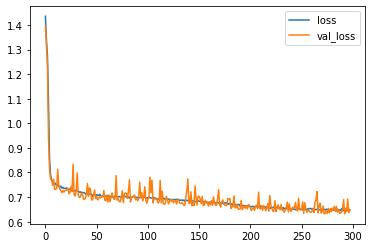

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [33]:
X = scaler.transform(X)
predictions = model.predict(X)
predictions

2485/2485 [==============================] - 9s 2ms/step


array([[-0.01770324],
       [-0.01047248],
       [-0.01614016],
       ...,
       [ 0.00191718],
       [-0.00282925],
       [-0.00219959]], dtype=float32)

In [34]:
len(predictions)

79500

In [36]:
predictions[36074][0]

2.869335

In [37]:
result = []
for i in range(0,len(predictions)):
    result.append(round(predictions[i][0]))

In [38]:
col = ['Answer']
result = pd.DataFrame(result,columns=col)
result

,Answer
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [39]:
result.iloc[36000,0]

3

In [40]:
count = 0
for i in range(0,79500):
    if result.iloc[i,0] == annot_list.iloc[i,0]:
        count = count+1

In [41]:
count

54999

In [42]:
acc = count/79500

In [43]:
acc

0.691811320754717

In [44]:
model.save('Sleep_stage1.h5')